# Лабораторна робота №4
# Обробка зображень та робота з наборами файлів цифрових зображень

Виконав: студент групи КН-221в ШУЛЮПОВ Єгор <br>
Перевірив: асистент кафедри ЗВЄРЦЕВ Герман Олександрович

Мета: Отримати знання та навики в обробці цифрових зображень за
допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору
зображень.

# 1

,File Name,Format,Color Mode,Channels,File Size (MB),Width,Height,Full Path,Resized Image
0,0.png,PNG,RGB,3,0.31,400,400,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\0.png,
1,1.jpg,JPEG,RGB,3,0.23,749,726,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\1.jpg,
2,10.jpg,JPEG,RGB,3,0.32,730,1024,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\10.jpg,
3,11.jpg,JPEG,RGB,3,0.14,960,641,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\11.jpg,
4,12.webp,WEBP,RGB,3,0.38,1115,1600,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\12.webp,
5,13.webp,WEBP,RGB,3,0.19,2000,2000,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\13.webp,
6,2.webp,WEBP,RGB,3,0.19,800,1155,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\2.webp,
7,3.png,PNG,L,1,0.10,500,597,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\3.png,
8,4.jpg,JPEG,RGB,3,0.48,3963,3845,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\4.jpg,
9,5.png,PNG,RGBA,4,1.04,1080,1004,C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media\5.png,

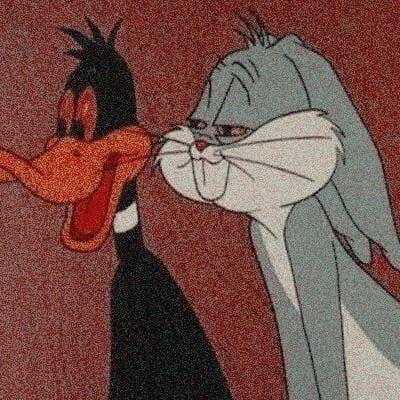
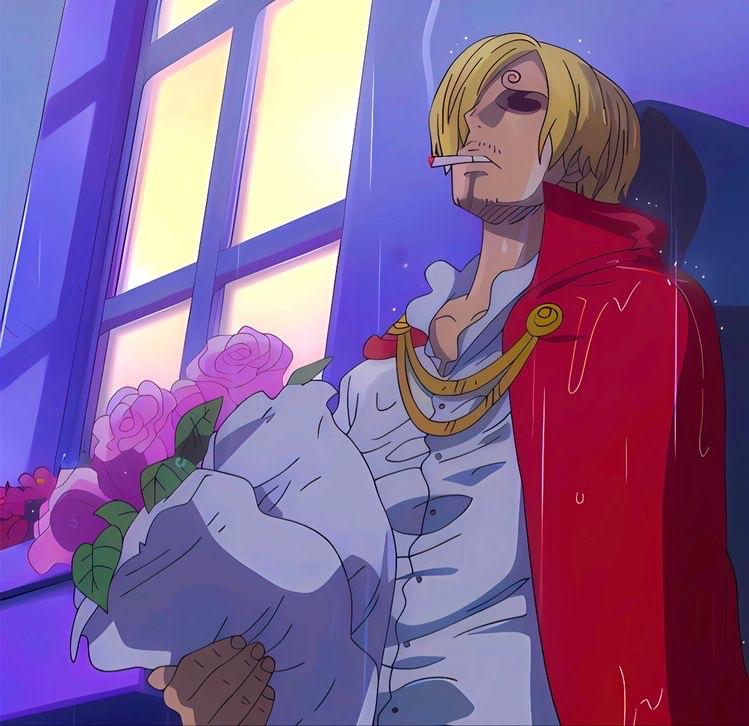
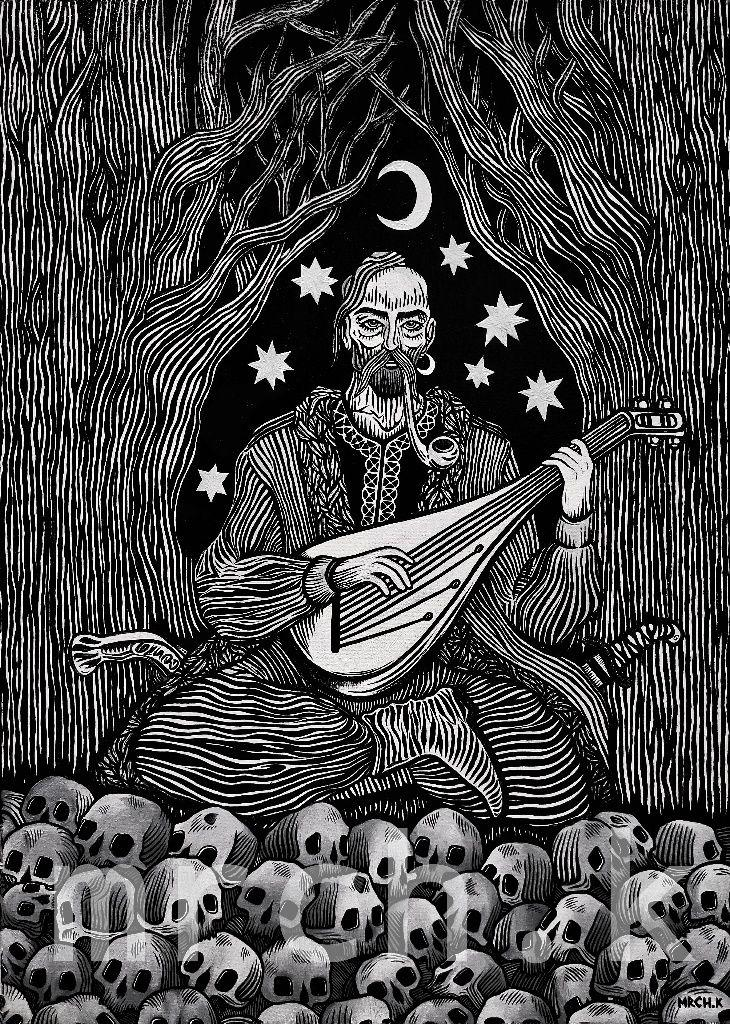
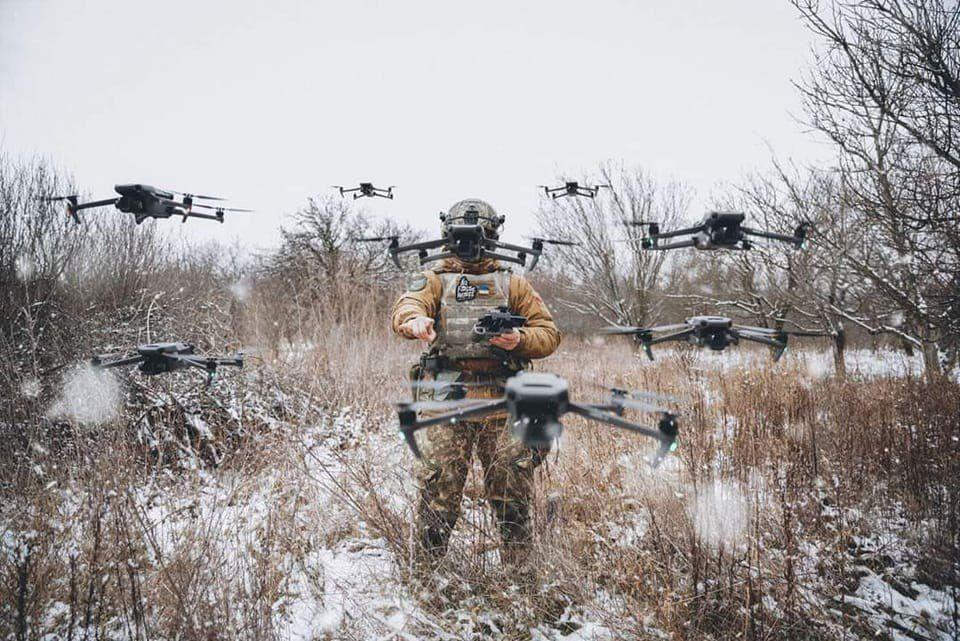
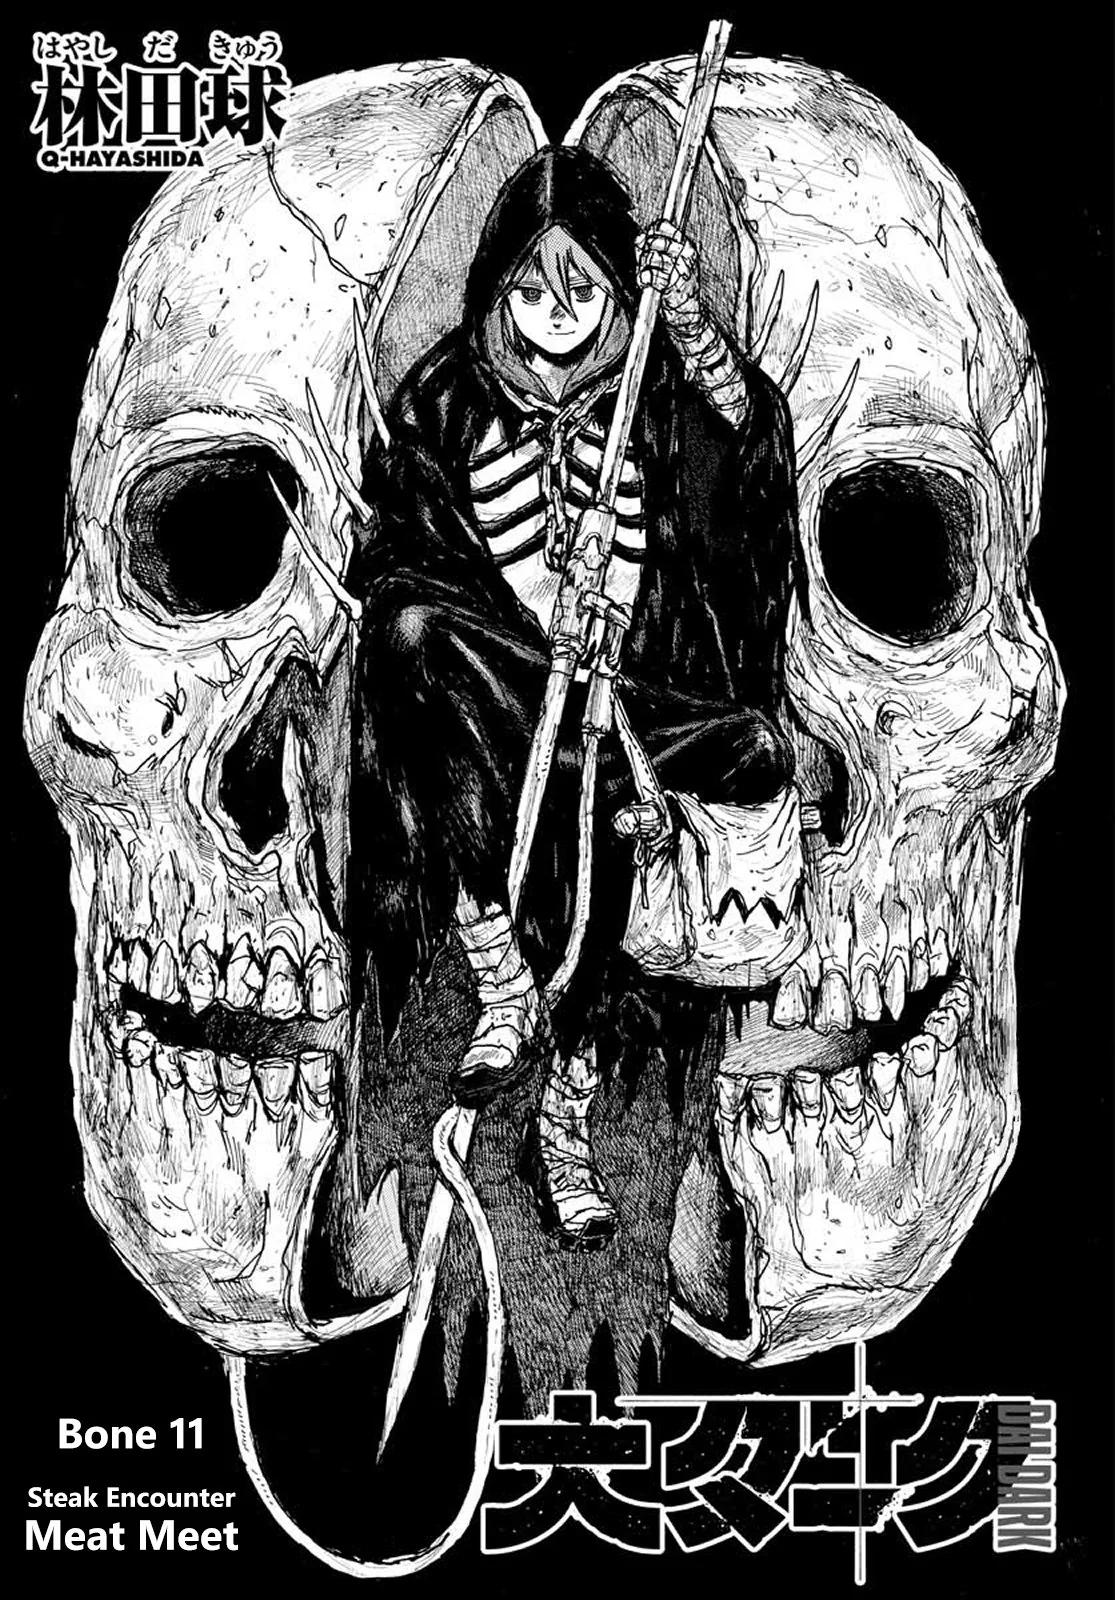
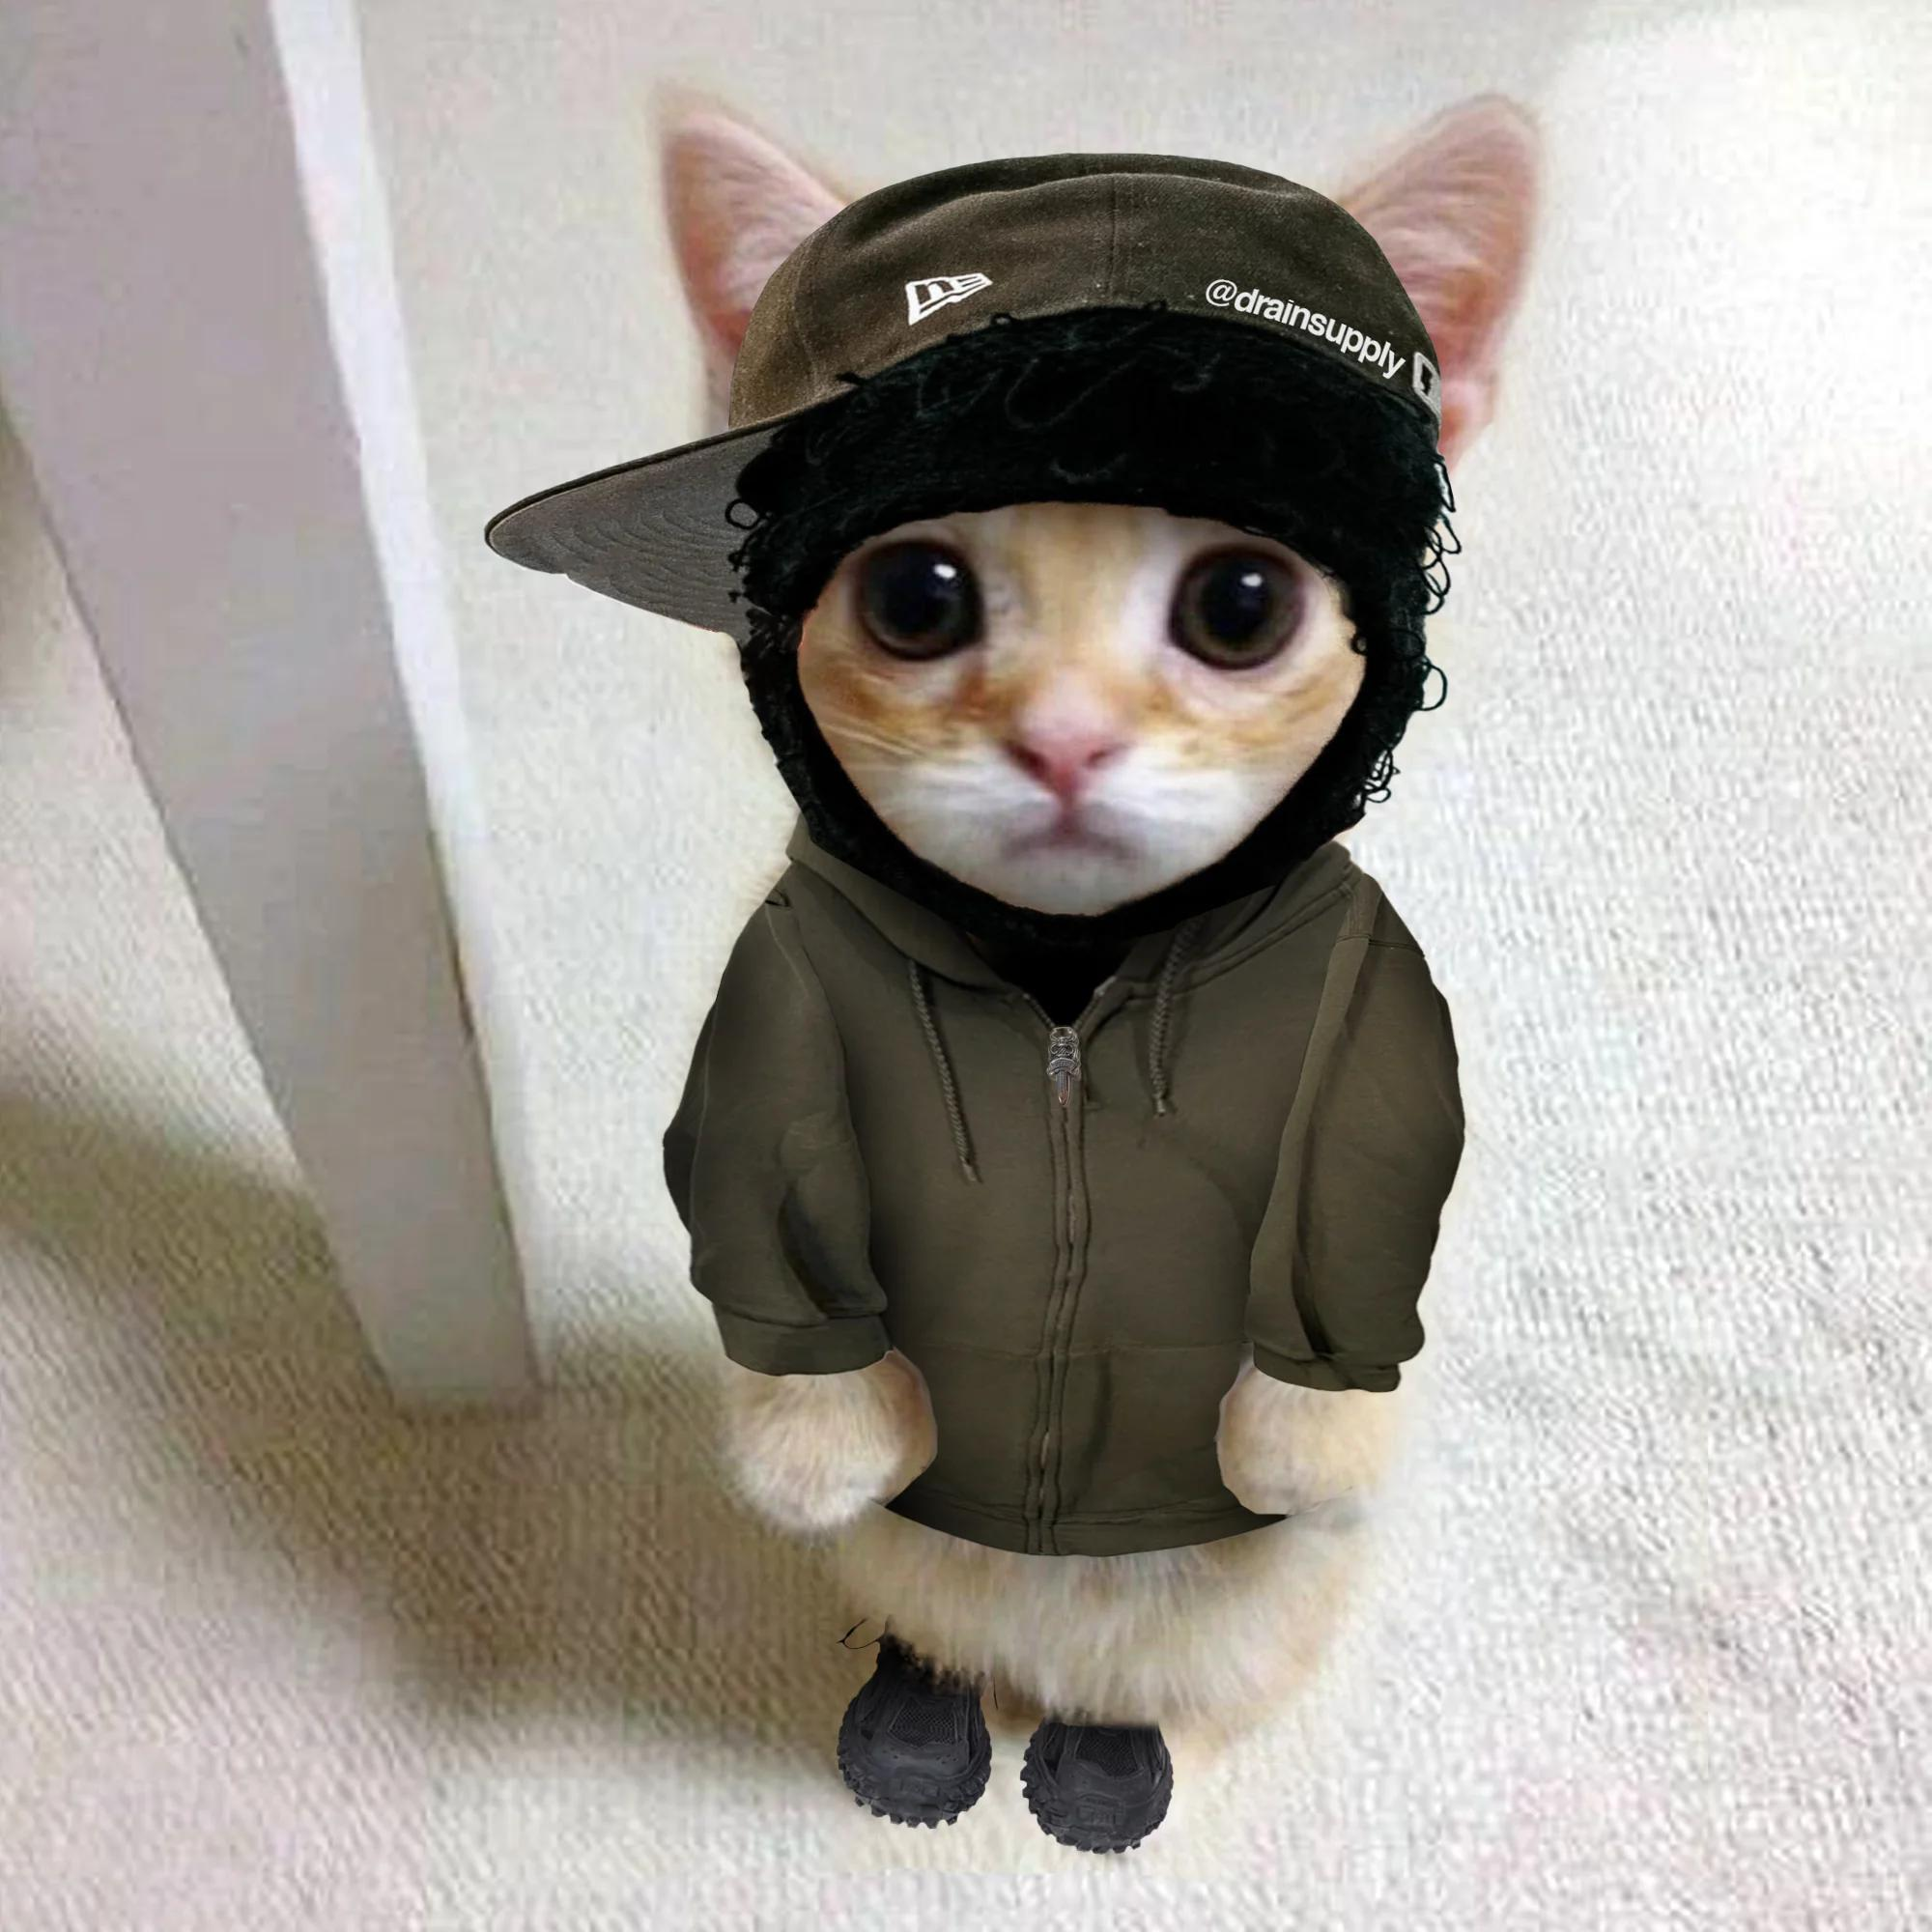
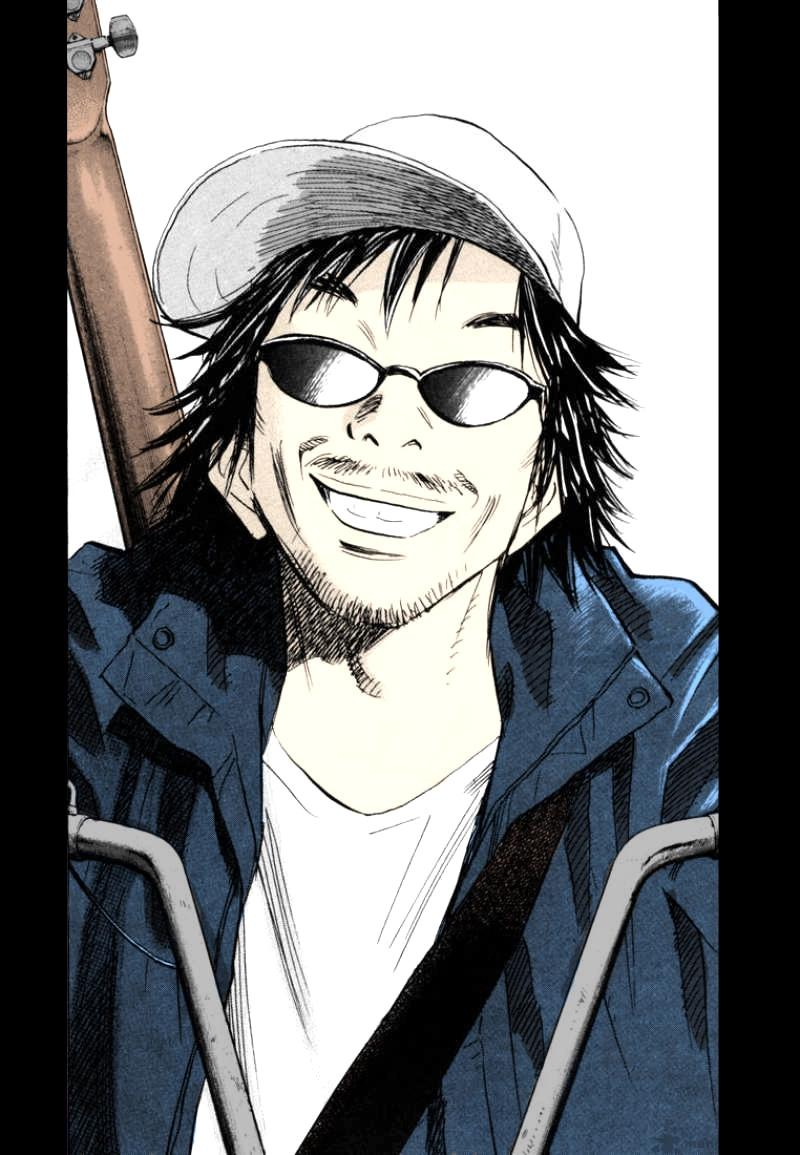
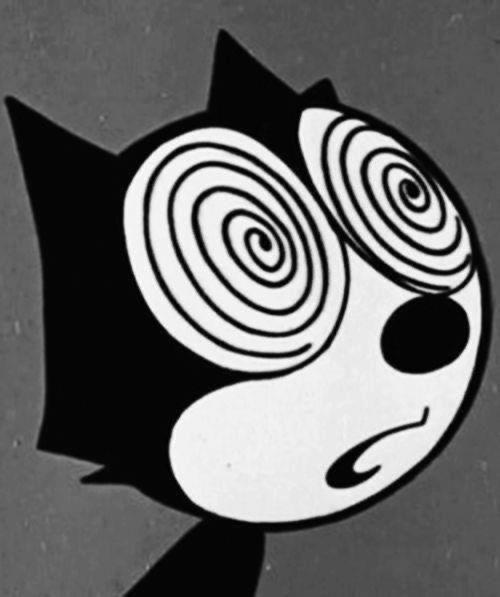
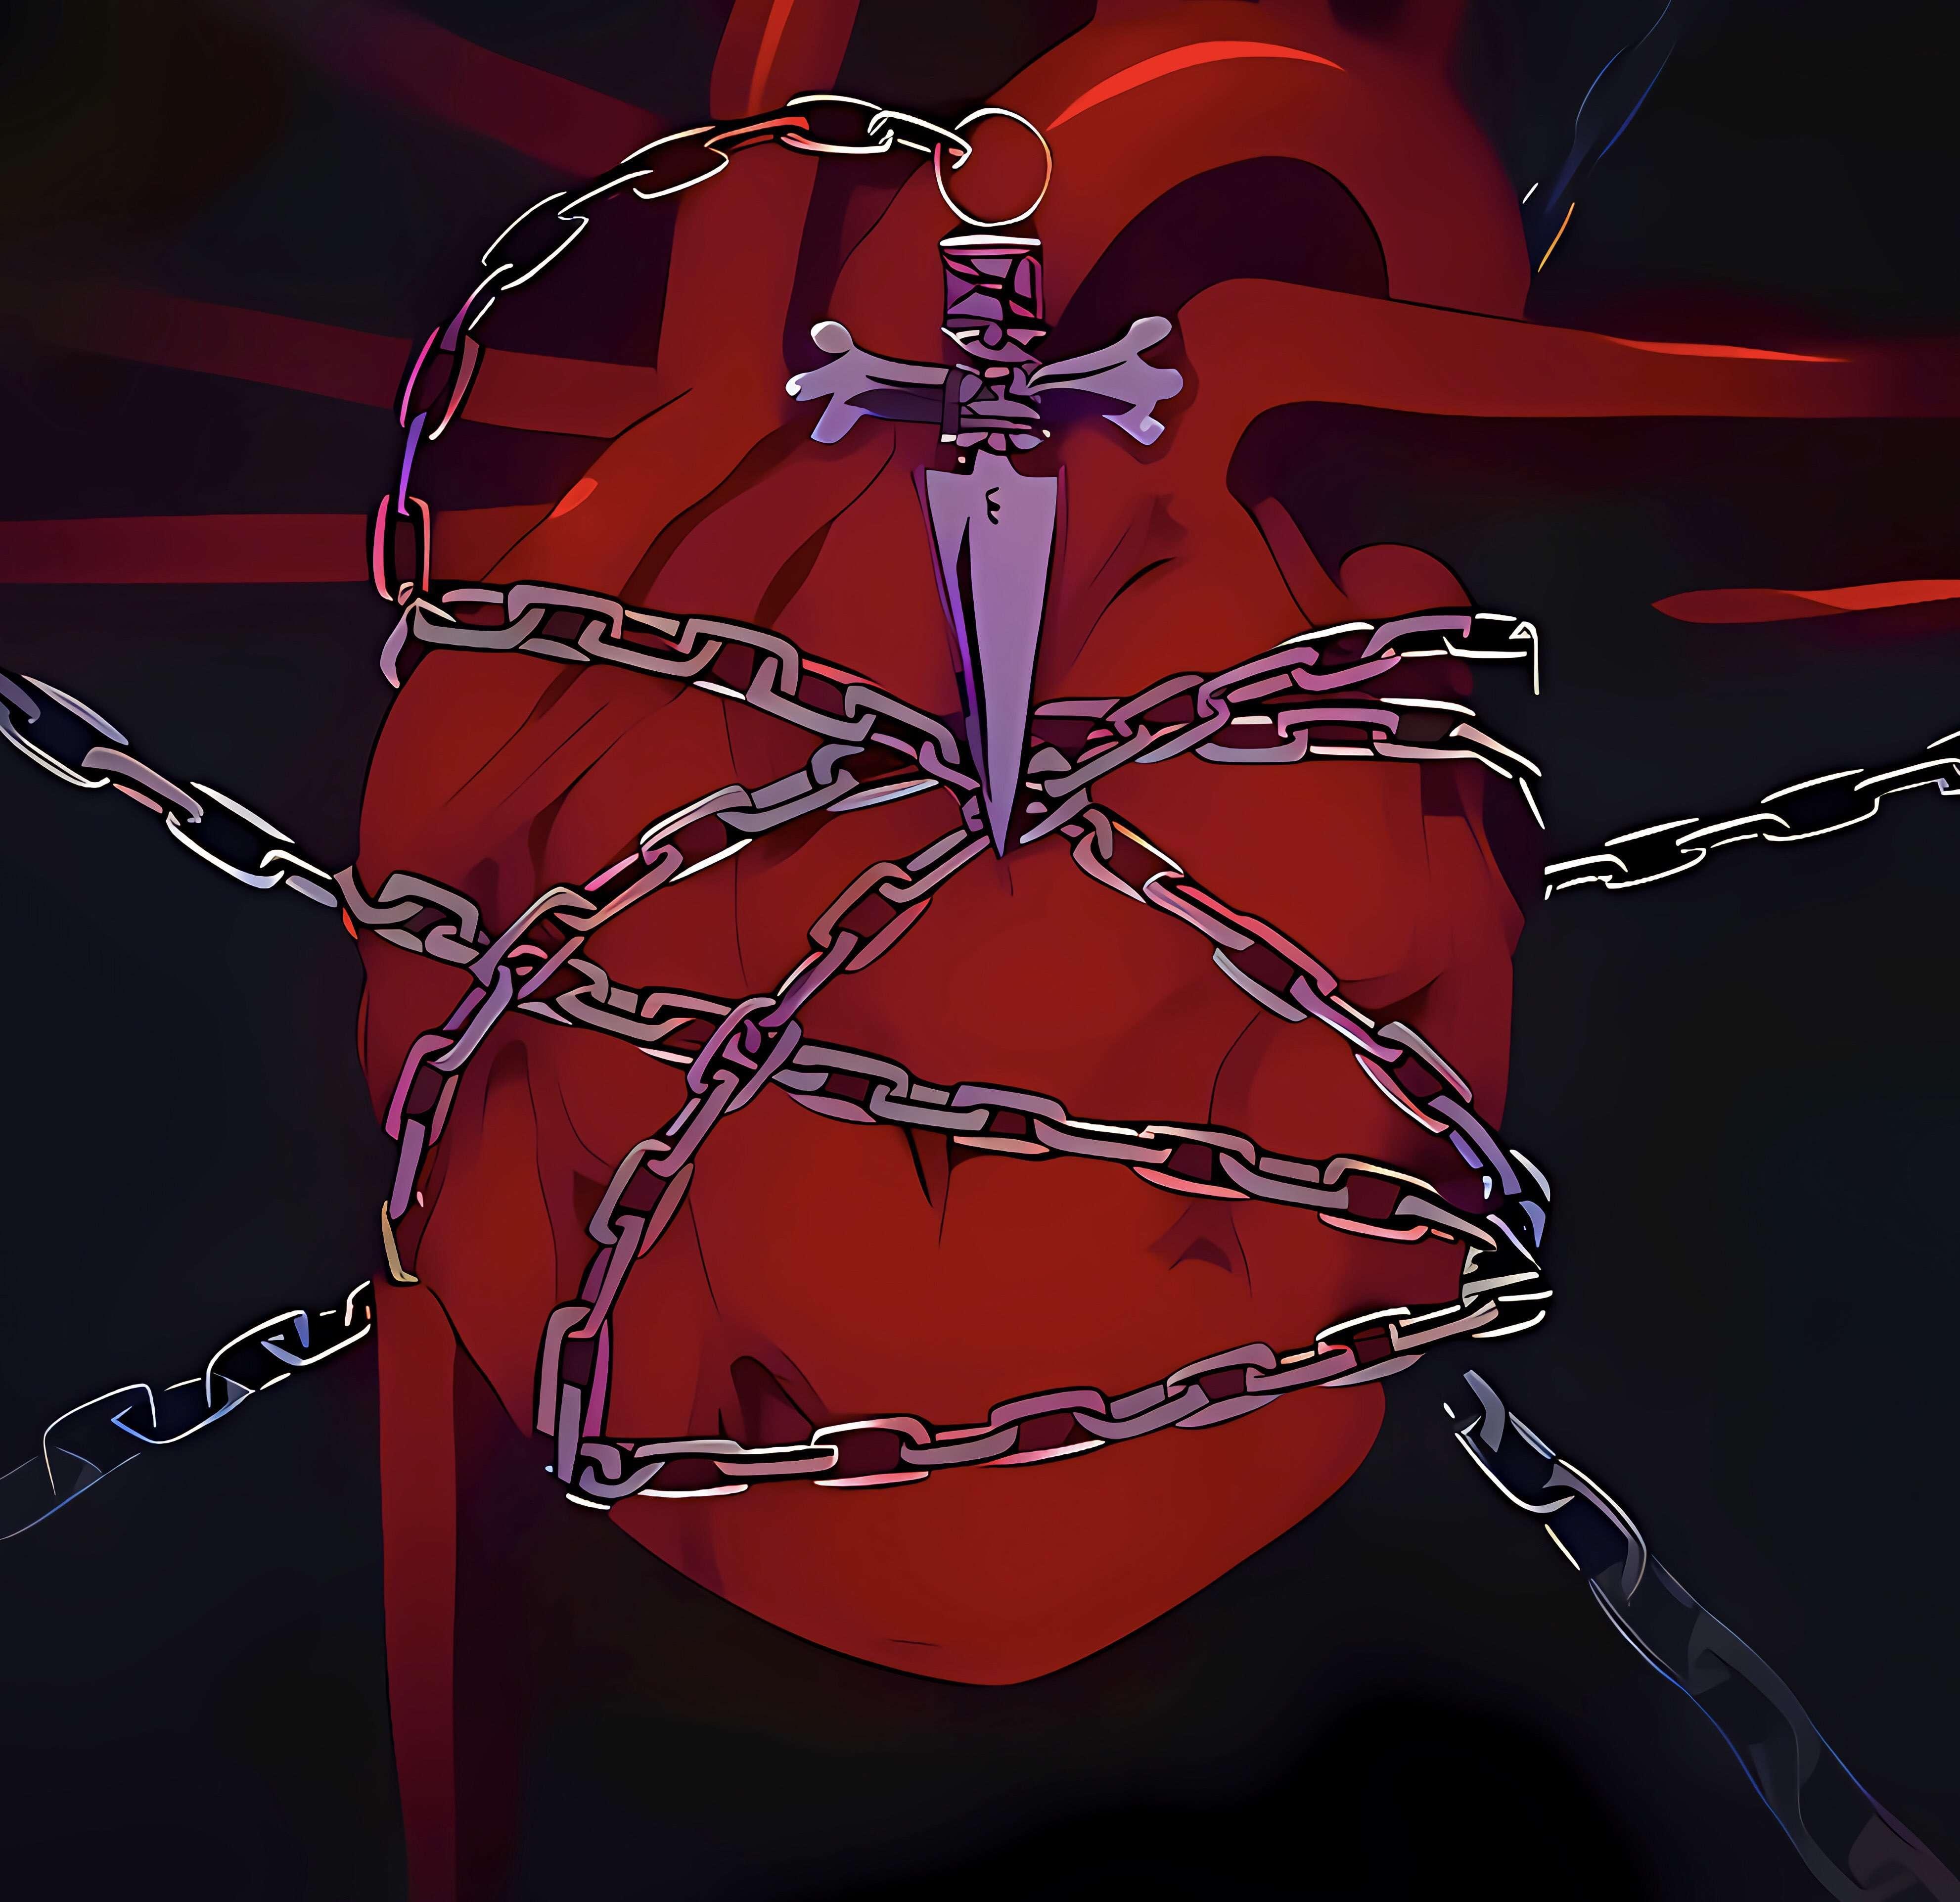
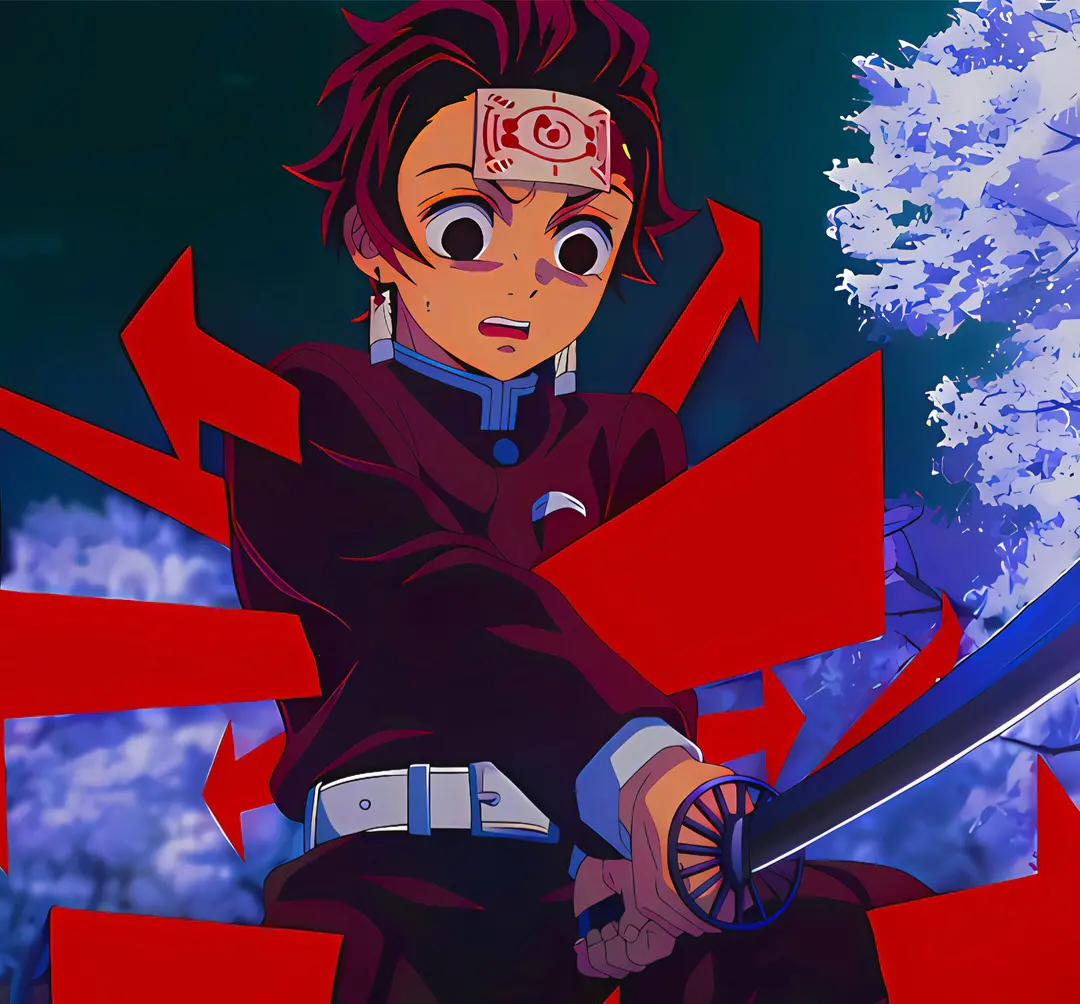
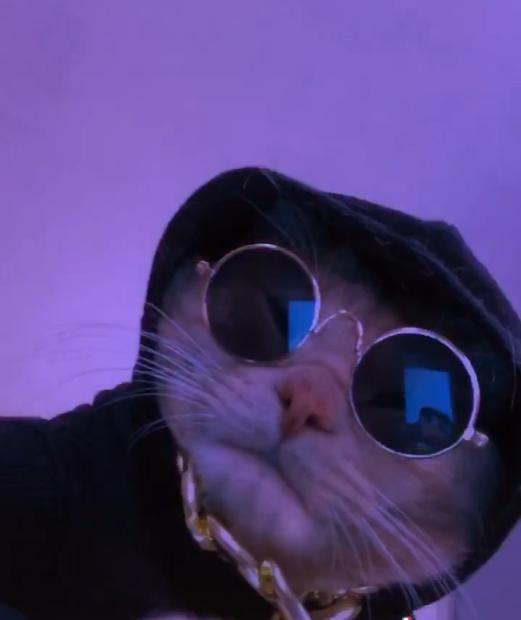
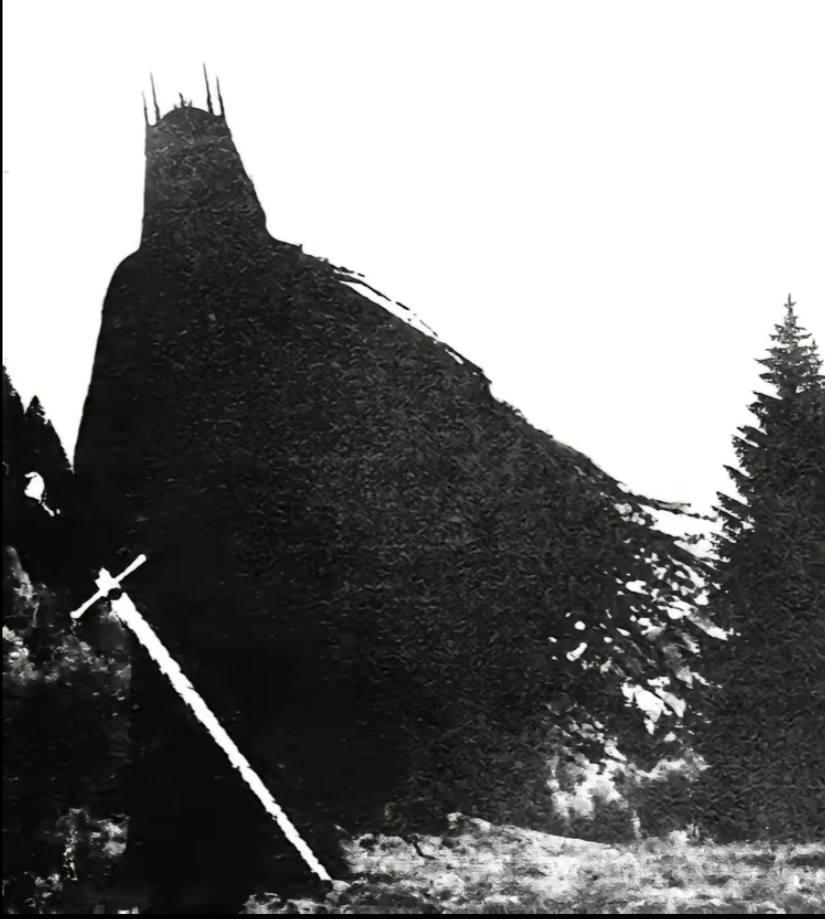
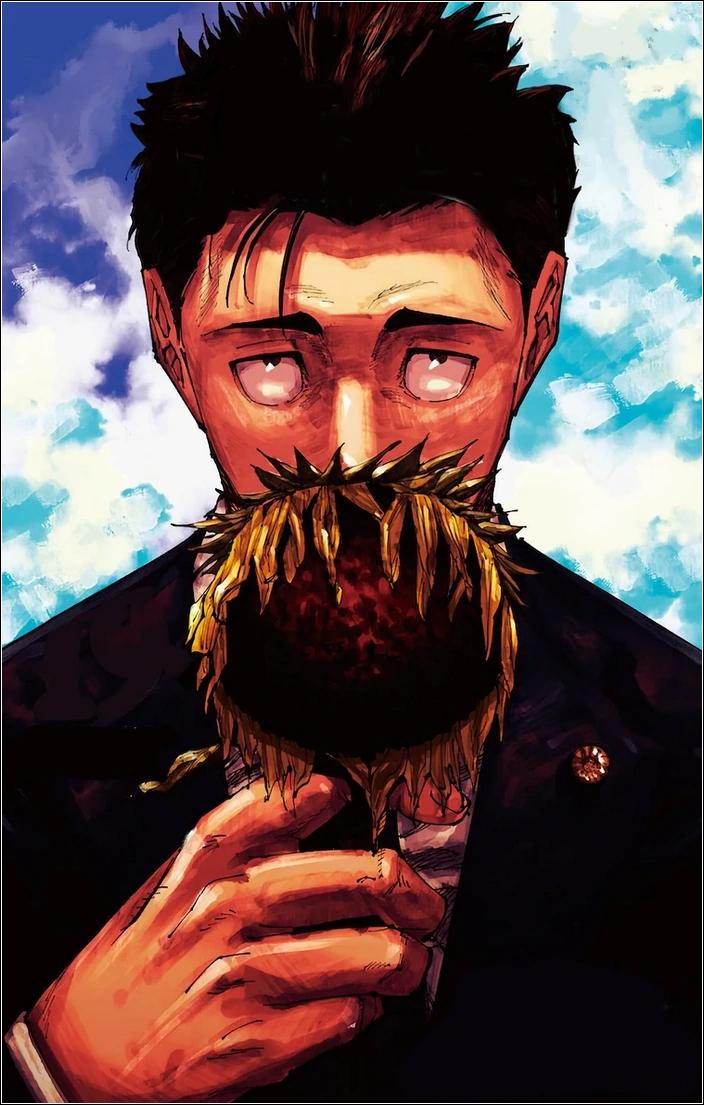
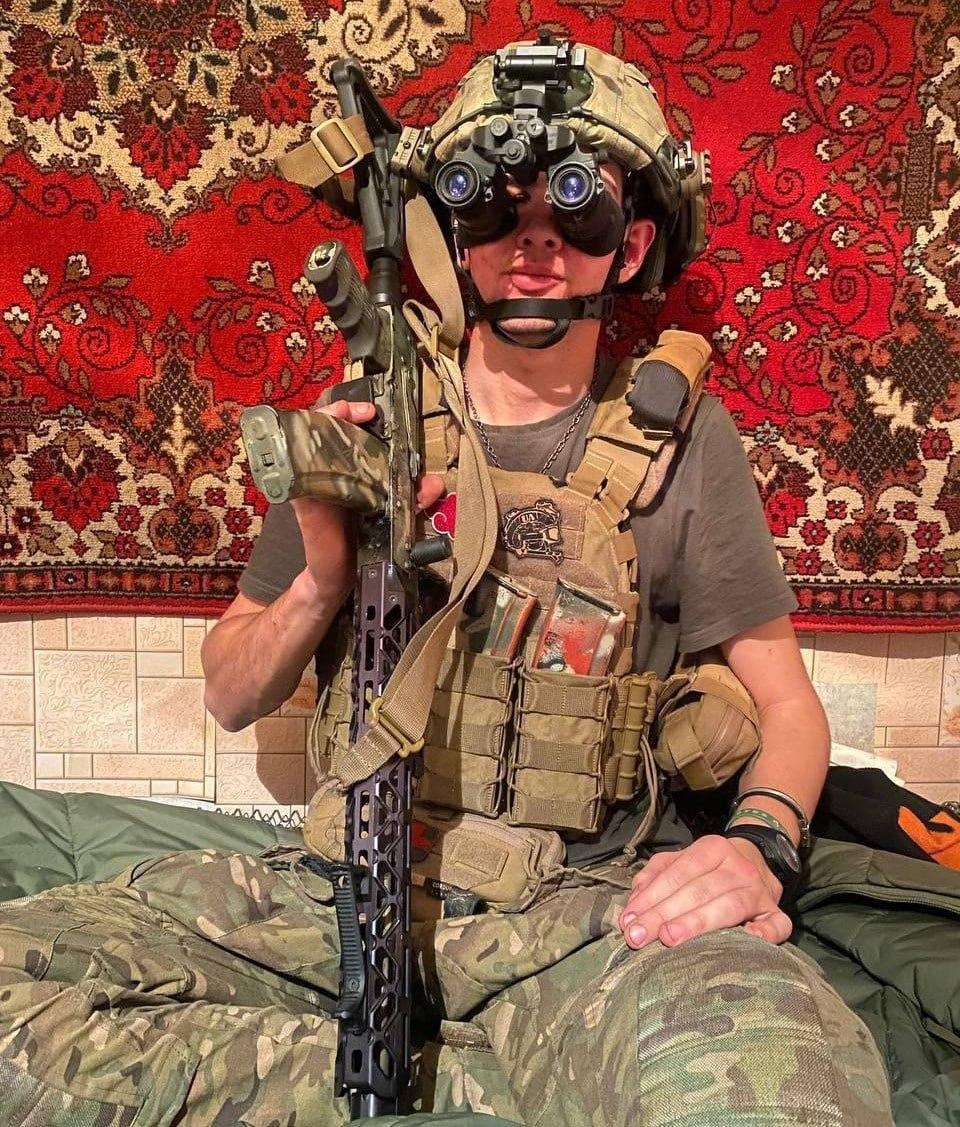
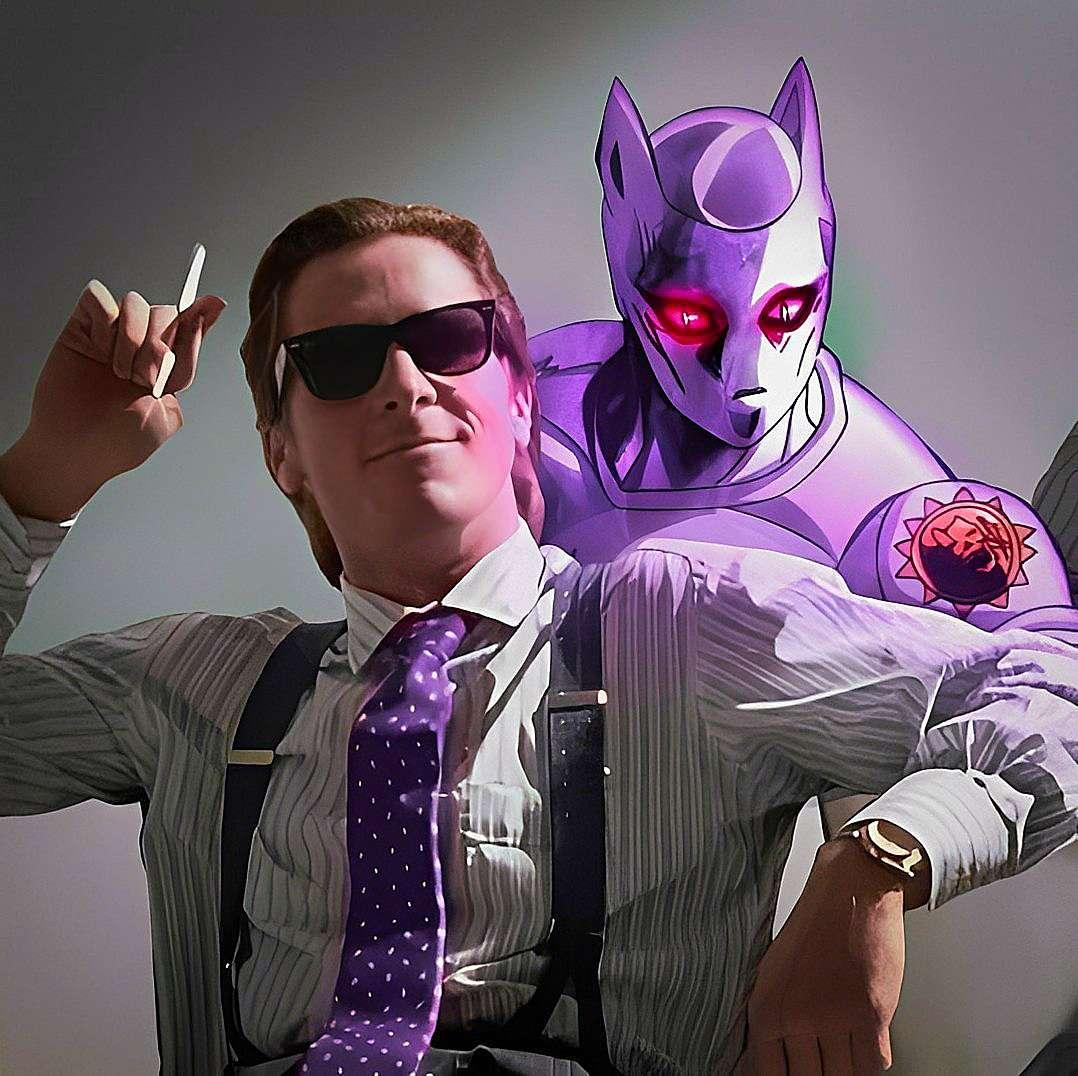

In [2]:
from PIL import Image
import os
import glob
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def image_info(directory):
    image_data = []

    image_files = glob.glob(os.path.join(directory, '*'))

    for file in image_files:
        try:
            with Image.open(file) as img:
                file_name = os.path.basename(file)
                image_format = img.format
                mode = img.mode
                channels = len(img.getbands())
                file_size = os.path.getsize(file) / (1024 * 1024)  # Розмір у MB
                file_size = round(file_size, 2)
                width, height = img.size
                full_path = os.path.abspath(file)
                
                resized_img = img.convert("RGB")  

                buffered = BytesIO()
                resized_img.save(buffered, format="JPEG")
                img_str = base64.b64encode(buffered.getvalue()).decode()
                
                img_tag = f'<img src="data:image/jpeg;base64,{img_str}">'
                
                image_data.append({
                    'File Name': file_name,
                    'Format': image_format,
                    'Color Mode': mode,
                    'Channels': channels,
                    'File Size (MB)': file_size,
                    'Width': width,
                    'Height': height,
                    'Full Path': full_path,
                    'Resized Image': img_tag  
                })
        except (IOError, SyntaxError):
            pass

    df = pd.DataFrame(image_data)
    return df

folder_path = r'C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media'

image_dataframe = image_info(folder_path)

display(HTML(image_dataframe.to_html(escape=False)))

# 2

In [7]:
from PIL import Image, ImageEnhance
import os
import random

def create_poster(folder_path, output_name, images_in_row, images_in_column):
    def apply_random_color_filter(image):
        color_filters = [
            'color', 'contrast', 'brightness', 'sharpness', 'sharpness', 'color'
        ]
        random_filter = random.choice(color_filters)
        enhanced_image = ImageEnhance.Color(image).enhance(3.0)
        saturation_factor = random.uniform(0.5, 2.0)  # Диапазон для насыщенности

        if random_filter == 'color':
            enhanced_image = ImageEnhance.Color(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'contrast':
            enhanced_image = ImageEnhance.Contrast(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'brightness':
            enhanced_image = ImageEnhance.Brightness(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'sharpness':
            enhanced_image = ImageEnhance.Sharpness(enhanced_image).enhance(3.0 * saturation_factor)
        
        return enhanced_image

    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)
                   if filename.endswith(".jpg") or filename.endswith(".png")]

    poster_width = images_in_row * 500
    poster_height = images_in_column * 500
    poster = Image.new('RGB', (poster_width, poster_height))

    for i in range(images_in_row):
        for j in range(images_in_column):
            if image_paths:
                random_image_path = random.choice(image_paths)
                image_paths.remove(random_image_path)
                
                img = Image.open(random_image_path)
                width, height = img.size
                size = min(width, height)
                left = (width - size) / 2
                top = (height - size) / 2
                right = (width + size) / 2
                bottom = (height + size) / 2
                img = img.crop((left, top, right, bottom))
                img = img.resize((500, 500))
                
                img = apply_random_color_filter(img)
                
                poster.paste(img, (i * 500, j * 500))

    poster.save(output_name)

### виклик

folder_path = r'C:\Users\esulu\Desktop\WXRK_FXLDER\5semester\python\python4\media'
output_name = "Poster0.jpg"
images_in_row = 3
images_in_column = 2

create_poster(folder_path, output_name, images_in_row, images_in_column)